## concatenation 

* pd.concat(objs, axis = 0, join = 'outer', join_axes = None, ignore_index = False, keys = None, levels = None, verify_integrity = False, copy = True

In [12]:
import pandas as pd
import numpy as np
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])
## axis_default: axis = 0: 밑으로 쌓는 방향
# x=[1,2,3]; y=[4,5,6]; z=[7,8,9]
# np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
def make_df(cols, ind): 
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

In [10]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1); print(df2); print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [18]:
# Question
# print(pd.concat([df1, df2], axis=1))

In [20]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index
print(x); print(y); print(pd.concat([x, y], axis = 1))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B   A   B
0  A0  B0  A2  B2
1  A1  B1  A3  B3


In [21]:
# duplicate indices
print(pd.concat([x, y], axis = 0))

    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


In [22]:
# ignoring the index
print(pd.concat([x, y], ignore_index = True))

    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


In [27]:
# adding multiindex keys
print(x); print(y)
pd.concat([x, y], keys=['x', 'y'])
#pd.concat([x, y], keys=['x', 'y'], axis = 1)

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

In [64]:
# concatenation with joins
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5); print(df6)
pd.concat([df5, df6], join='inner')   # colname 교집합

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4


,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


In [30]:
pd.concat([df5, df6], join_axes=[df5.columns])   # join_axes: 해당 axes를 기준으로 


,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,NaN,B3,C3
4,NaN,B4,C4


## append method

In [31]:
print(df1); print(df2); print(df1.append(df2))
df1
# append: modify 하지 않고 새로운 df를 만듬, new data buffer 이용하므로 효율적이지 않음

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [32]:
df1.append

,A,B
1,A1,B1
2,A2,B2


# Combining Datasets: Merge and Join

## categories of joins

In [45]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                        'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
'hire_date': [2004, 2008, 2012, 2014]}) 
print(df1); print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [36]:
# one-to-one joins
df3 = pd.merge(df1, df2)   # df1을 main으로(index도), df2를 추가하는 방식
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [38]:
# Many to one joins
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                               'supervisor': ['Carly', 'Guido', 'Steve']})
print(df4)
pd.merge(df3, df4)   # df3를 main으로, df4를 추가하는 방식

         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve


,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [77]:
# Many to many joins
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                            'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                                'spreadsheets', 'organization']})
print(df1); print(df5) 
pd.merge(df1, df5)   # main은 df1이지만, 두개씩 확장

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization


,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


## Specification of the merge key

In [46]:
# the on keyword
print(df1); print(df2)
pd.merge(df1, df2, on='employee')   
# 같은 column name을 공유할때, 그 column을 기준으로 merge, column에서 item이 서로 다르면 제외

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [49]:
# the left_on and right_on keywords
# col_name은 다르지만 item은 같을 때에 공통 column을 각 df의 기준으로 명시하는 방식
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],'salary': [70000, 80000, 120000, 90000]}) 
print(df1); print(df3);
pd.merge(df1, df3, left_on="employee", right_on="name")

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000


,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


In [50]:
# 중복되니까 col하나 제거
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [51]:
df1a = df1.set_index('employee') 
df2a = df2.set_index('employee') 
print(df1a); print(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [57]:
print(df1a); print(df2a);
pd.merge(df1a, df2a, left_index=True, right_index=True)
# 같은 명령어 df1a.join(df2a)  

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [62]:
print(df1a); print(df3);
pd.merge(df1a, df3, left_index=True,right_on='name')
pd.merge(df1a, df3, left_index=True,right_index = True)
#################################

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000


,group,name,salary


In [76]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                                'food': ['fish', 'beans', 'bread']},
                               columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                                'drink': ['wine', 'beer']},columns=['name', 'drink']) 
print(df6); print(df7)
pd.merge(df6, df7)  # 공통 column이 name, 공통 column에 대한 item을 교집합으로

    name   food
0  Peter   fish
1   Paul   bean
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer


,name,food,drink
0,Mary,bread,wine


In [74]:
pd.merge(df6, df7, how = 'inner')   # inner: 교집합

,name,food,drink
0,Mary,bread,wine


In [73]:
pd.merge(df6, df7, how='outer')   # 공통 column에 대해 item 합집합

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [70]:
pd.concat([df6, df7])   # concat은 column 합집합

,drink,food,name
0,NaN,fish,Peter
1,NaN,beans,Paul
2,NaN,bread,Mary
0,wine,NaN,Mary
1,beer,NaN,Joseph


In [72]:
#pd.concat([df6, df7], join = 'inner', ignore_index= True)   # inner: column name교집합, concat: item 합집합

,name
0,Peter
1,Paul
2,Mary
3,Mary
4,Joseph


## overlapping column names: The suffixes keyword

In [84]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                                'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
print(df8); print(df9)
pd.merge(df8, df9)

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2


,name,rank


In [85]:
pd.merge(df8, df9, on="name")

,name,rank_x,rank_y
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [86]:
pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


## Example

In [1]:
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv
    

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57935  100 57935    0     0   106k      0 --:--:-- --:--:-- --:--:--  106k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   835  100   835    0     0   2141      0 --:--:-- --:--:-- --:--:--  2135
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   872  100   872    0     0   1265      0 --:--:-- --:--:-- --:--:--  1265


In [88]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

In [89]:
print(pop.head()); print(areas.head()); print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [90]:
merged = pd.merge(pop, abbrevs, how='outer',
                left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info merged.head()

In [94]:
# check whether there were any rows with nulls
merged.isnull().any()   # 하나라도

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [96]:
# nan있는 rows
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [97]:
# nan 있는 row의 state/region
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [98]:
# state에 채워넣기
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [105]:
final = pd.merge(merged, areas, on='state', how='left')
#left: use only keys from left frame
###########################
print(merged.head()); print(areas.head())
final.head()

  state/region     ages  year  population    state
0           AL  under18  2012   1117489.0  Alabama
1           AL    total  2012   4817528.0  Alabama
2           AL  under18  2010   1130966.0  Alabama
3           AL    total  2010   4785570.0  Alabama
4           AL  under18  2011   1125763.0  Alabama
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707


,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [103]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)    False
dtype: bool

In [110]:
final['state'][final['area (sq. mi)'].isnull()]

2496    United States
2497    United States
2498    United States
2499    United States
2500    United States
2501    United States
2502    United States
2503    United States
2504    United States
2505    United States
2506    United States
2507    United States
2508    United States
2509    United States
2510    United States
2511    United States
2512    United States
2513    United States
2514    United States
2515    United States
2516    United States
2517    United States
2518    United States
2519    United States
2520    United States
2521    United States
2522    United States
2523    United States
2524    United States
2525    United States
2526    United States
2527    United States
2528    United States
2529    United States
2530    United States
2531    United States
2532    United States
2533    United States
2534    United States
2535    United States
2536    United States
2537    United States
2538    United States
2539    United States
2540    United States
2541    Un

In [111]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [116]:
final.dropna(inplace=True)   # return none
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [117]:
# string 내의 조건을 만족하는 df
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [118]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [119]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [120]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

# Aggregation and Grouping

* summarization: sum(), mean(), min(), max()

In [122]:
import seaborn as sns
planets = sns.load_dataset('planets') 
planets.shape

(1035, 6)

In [123]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


## Simple Aggregation

In [136]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [129]:
ser.sum()

2.811925491708157

In [130]:
ser.mean()

0.5623850983416314

In [137]:
df = pd.DataFrame({'A': rng.rand(5),
                    'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [138]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [139]:
df.mean(axis='columns')   #  같은 row끼리의 평균

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [140]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


## Groupby: split, apply, combine

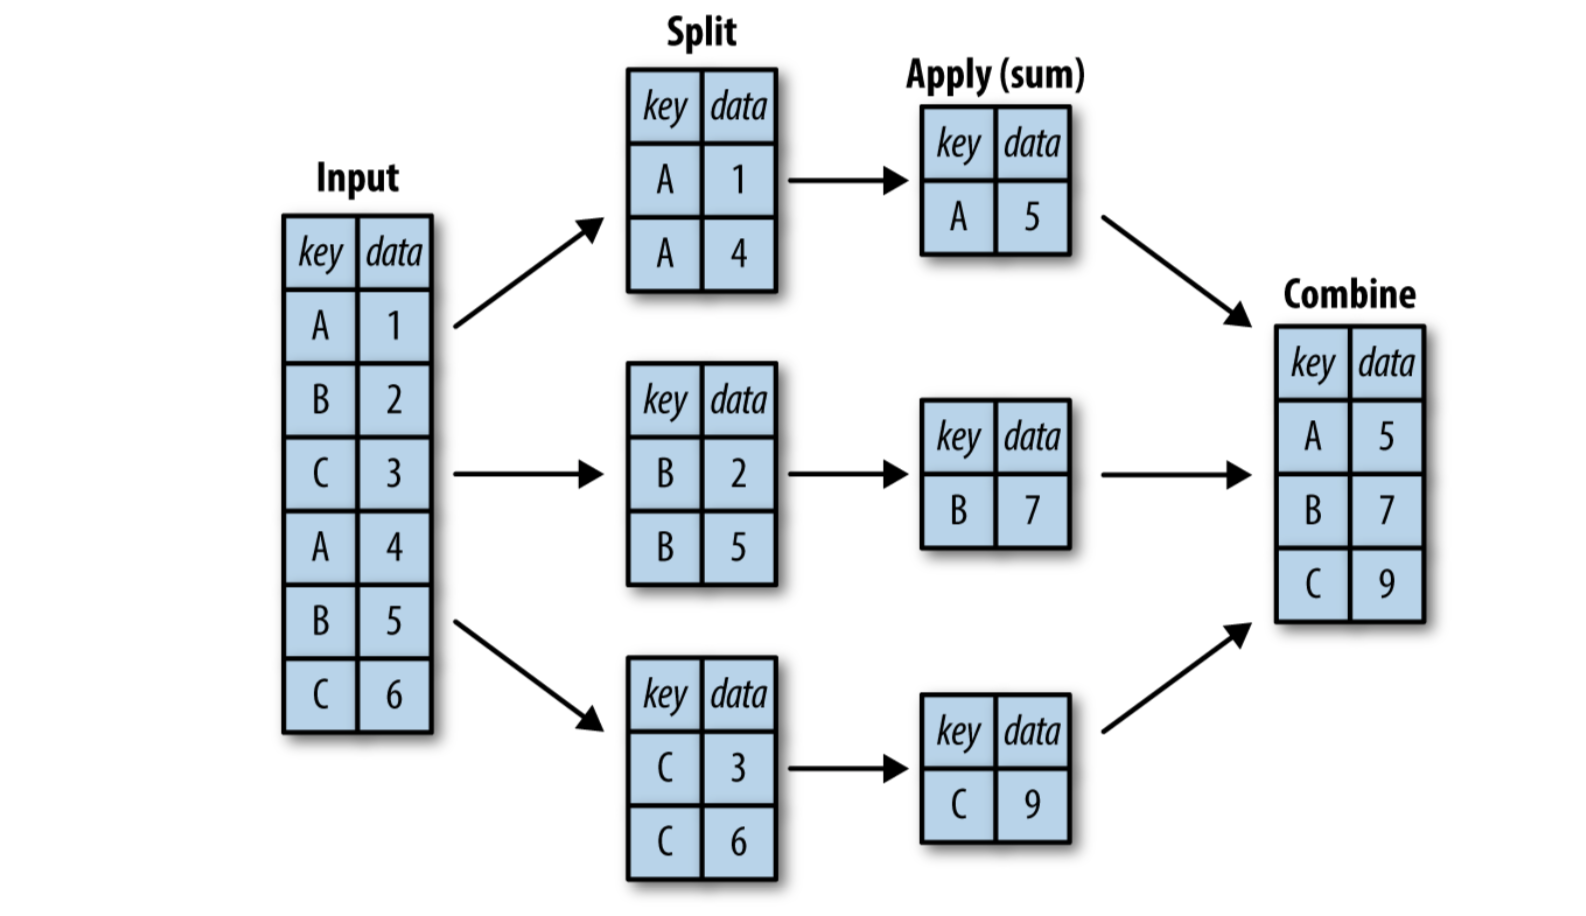

In [147]:
from IPython.display import Image
PATH = "/Users/yjlee/Desktop/Grad2/FinancialEngineering/lesson/"
Image(filename = PATH + "groupby.png", width=900, height=500)

In [149]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [150]:
df.groupby('key')

In [151]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [152]:
planets.groupby('method')

In [153]:
planets.groupby('method')['orbital_period']

In [154]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [160]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [162]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                    'data1': range(6),
                    'data2': rng.randint(0, 10, 6)},columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


### Aggregate

In [163]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [164]:
df.groupby('key').aggregate({'data1': 'min',
                            'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


### filter: drop data based on the group properties

In [167]:
def filter_func(x):
    return x['data2'].std() > 4 
print(df); print(df.groupby('key').std())
df.groupby('key').filter(filter_func)
# 위조건에 true인 item만 나옴

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641


,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


### transform

In [166]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


### apply: apply an arbitrary function to the group results

In [168]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum() 
    return x
print(df)
df.groupby('key').apply(norm_by_data2)

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9


,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


In [173]:
# A dictionary or series mapping index to group
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'} 
print(df2); 
df2.groupby(mapping).sum()

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9


,data1,data2
consonant,12,19
vowel,3,8


In [170]:
# pass any python function
print(df2); print(df2.groupby(str.lower).mean())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
   data1  data2
a    1.5    4.0
b    2.5    3.5
c    3.5    6.0


In [172]:
# grouping example
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


# Pivot Tables
* a multidimensional version of GroupBy aggregation

In [175]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [176]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [180]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## Pivot Table Syntax

In [179]:
titanic.pivot_table('survived', index='sex', columns='class')


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### Multilevel pivot tables

In [183]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [ ]:
#DataFrame.pivot_table(data, values=None, index=None, columns=None,
#                          aggfunc='mean', fill_value=None, margins=False,
#                          dropna=True, margins_name='All')


In [185]:
titanic.pivot_table(index='sex', columns='class',
                               aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [186]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)


class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


## Example: Birthrate Data

In [187]:
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv
    

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  258k  100  258k    0     0   276k      0 --:--:-- --:--:-- --:--:--  275k


In [188]:
births = pd.read_csv('births.csv')

In [189]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [190]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')


gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0,0.5,'total births per year')

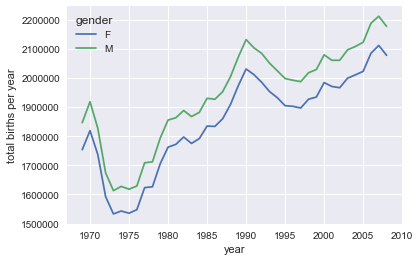

In [193]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot() 
plt.ylabel('total births per year')